### Numpy: Understanding Covariation and Correlation among your predictor variables

If a dependent variable y (aka label, or target or outcome)   has an non zero covariance with some predictors x=[x0,x1,x2,..xk]

the set of predictors x can be used in a model to predict y with some level of performance

So seeing covariance of y with one or more of the variable in x   indicates we should be able to build a useful model.

However,  it can be a bit difficult to understand which of the predictors x are really important and which aren't if the x variables are correlate among themselves.  This turns out to be a major problem in trying to understand how a model is working



I will create a set of predictors  in numpy and then a response variable,  This is a monte carlo style simulation in which models are used in a generative role 

Remember that NumPy does not have row and column labels,  you have to keep track of the column placements,  or use Pandas instead of Numpy.    Pandas adds a number of conveniences,  like labels, to Numpy.

It would really make more sense to use a Pandas data frame to do this,  we'll see this next week

I'm going to build a model here with two "underlying factors" (a,b) that drive a set of four predictors x=(x1,x2,x3,x4)

I'm using a random normal set of values for a and a random set of exponential values for b

We will use numpy with Matplotlib and Seaborn for graphics plots

(array([ 13.,  70., 220., 395., 554., 443., 204.,  82.,  16.,   3.]),
 array([ 0.5844704 ,  2.65246324,  4.72045608,  6.78844892,  8.85644176,
        10.9244346 , 12.99242744, 15.06042028, 17.12841312, 19.19640597,
        21.26439881]),
 <BarContainer object of 10 artists>)

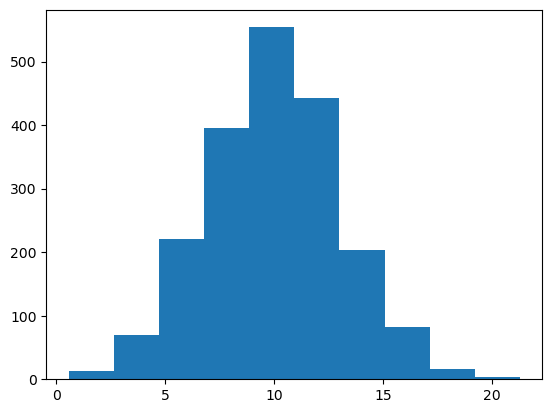

In [1]:
import numpy as np
import matplotlib.pyplot as plt

npts=2000

#underlying "factors"

a=np.random.normal(10,3,npts)
b=np.random.exponential(100,npts)

plt.hist(a)




(array([1.229e+03, 4.750e+02, 1.890e+02, 7.800e+01, 1.800e+01, 7.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.12571113e-02, 9.56873980e+01, 1.91363539e+02, 2.87039680e+02,
        3.82715821e+02, 4.78391961e+02, 5.74068102e+02, 6.69744243e+02,
        7.65420384e+02, 8.61096525e+02, 9.56772666e+02]),
 <BarContainer object of 10 artists>)

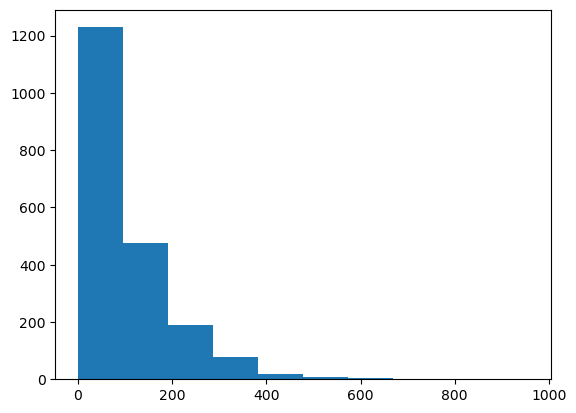

In [2]:
plt.hist(b)

In [3]:
#there is a small random correlation between a and b,   so these are basically independent variables
np.corrcoef(a,b)

array([[1.        , 0.01026297],
       [0.01026297, 1.        ]])

In [4]:
# create the predictors from a and b,  plus some noise,   these 4 variables are really just combinations of a and b
# with noise added,  so they will all be correlated.
# this means that they can be used as predictors for one another
# they are said to be non-colinear

x1= 10*a +b +np.random.normal(0, 10, npts)
x2= -15*a +b +np.random.normal(0, 15,npts)
x3= a*b/40 + 3*a +np.random.normal(0,15, npts)
x4= b + np.random.normal(0,20,npts)

x=[]                          #start with an emptyl list
x.append(x1)                  # x1 is a row vector, add it to the list as arow
x.append(x2)
x.append(x3)
x.append(x4)
x=np.asarray(x)               # convert x from a list to an np array
x=x.T                         # set x to be the transpose of itself, so that x1,x2,x3 and x4 are columns


In [5]:
# check to make sure the shape is right
x.shape

(2000, 4)

In [6]:
# the resulting set of predictors x, shows high correlations among predictors
np.corrcoef(x.T)

array([[1.        , 0.72025946, 0.82946976, 0.92818897],
       [0.72025946, 1.        , 0.43534708, 0.87484944],
       [0.82946976, 0.43534708, 1.        , 0.70518901],
       [0.92818897, 0.87484944, 0.70518901, 1.        ]])

<Axes: >

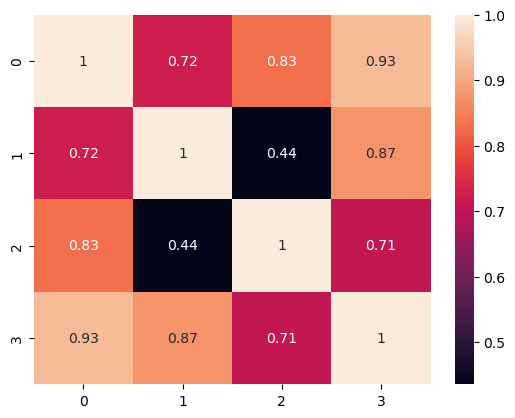

In [7]:
# Create a heat map of the correlation, using a plot routine from the seaborn package
import seaborn as sns

sns.heatmap(np.corrcoef(x.T),annot=True)

In [8]:
# we can also look at the covariance

In [9]:
np.cov(x.T)

array([[11084.52501926,  8702.71582217,  3044.99509165, 10114.06917464],
       [ 8702.71582217, 12255.2780979 ,  1805.98572729, 10037.71939267],
       [ 3044.99509165,  1805.98572729,  1191.68786274,  2574.40728313],
       [10114.06917464, 10037.71939267,  2574.40728313, 10505.24289394]])

<AxesSubplot:>

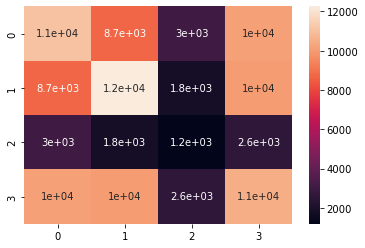

In [10]:
sns.heatmap(np.cov(x.T),annot=True)

In [8]:
# now let's create Y

# m - the multivariate slope 
# we want Y= 3*x1 + 2*x2 -x4 +error

# note there is no x3 term

m=np.asarray([3,2,0,-1])

Y= np.matmul(x,m.T) +np.random.normal(10,20,npts)

In [9]:
Y.shape

(2000,)

In [10]:
print('Corr Y with X1')
print(np.corrcoef(Y,x1))
print('Corr Y with X2')
print(np.corrcoef(Y,x2))
print('Corr Y with X3')
print(np.corrcoef(Y,x3))
print('Corr Y with X4')
print(np.corrcoef(Y,x4))


Corr Y with X1
[[1.         0.94929101]
 [0.94929101 1.        ]]
Corr Y with X2
[[1.         0.89513498]
 [0.89513498 1.        ]]
Corr Y with X3
[[1.         0.71547756]
 [0.71547756 1.        ]]
Corr Y with X4
[[1.         0.95916432]
 [0.95916432 1.        ]]


Remember that Y was created with no explicity dependence on X3 at all
    Y= 3*x1 + 2*x2 -x4 +error

But the correlation of Y was 0.73,  fairly high

Notice that each one of X1, X2 and X4 has a correlation of over .9 with Y,   each one is pretty significant looking,  they are would have pretty high R^2 values, including X3

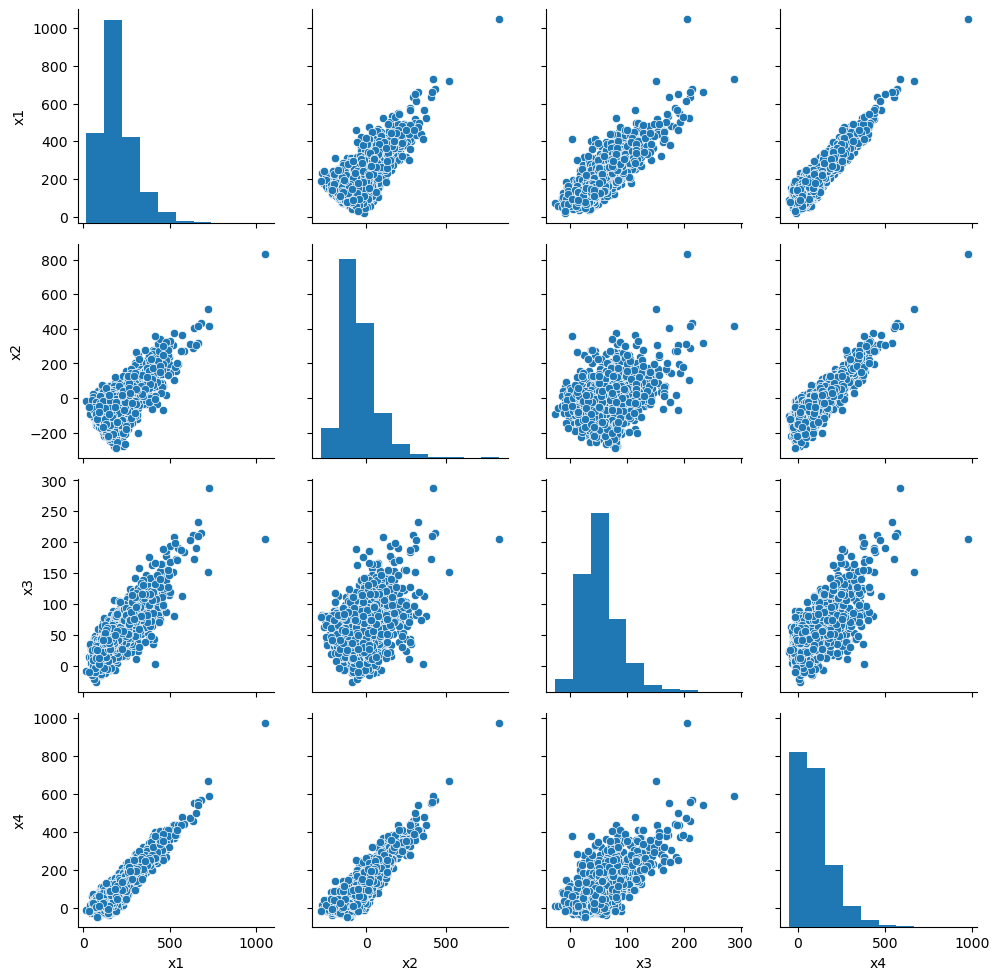

In [11]:
import pandas as pd

# almost a cheat here,   sns (seaborn) really wants a pandas data frame

x_p=pd.DataFrame(x,columns=['x1','x2','x3','x4'])
g = sns.PairGrid(x_p)
g = g.map_diag(plt.hist)
#g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

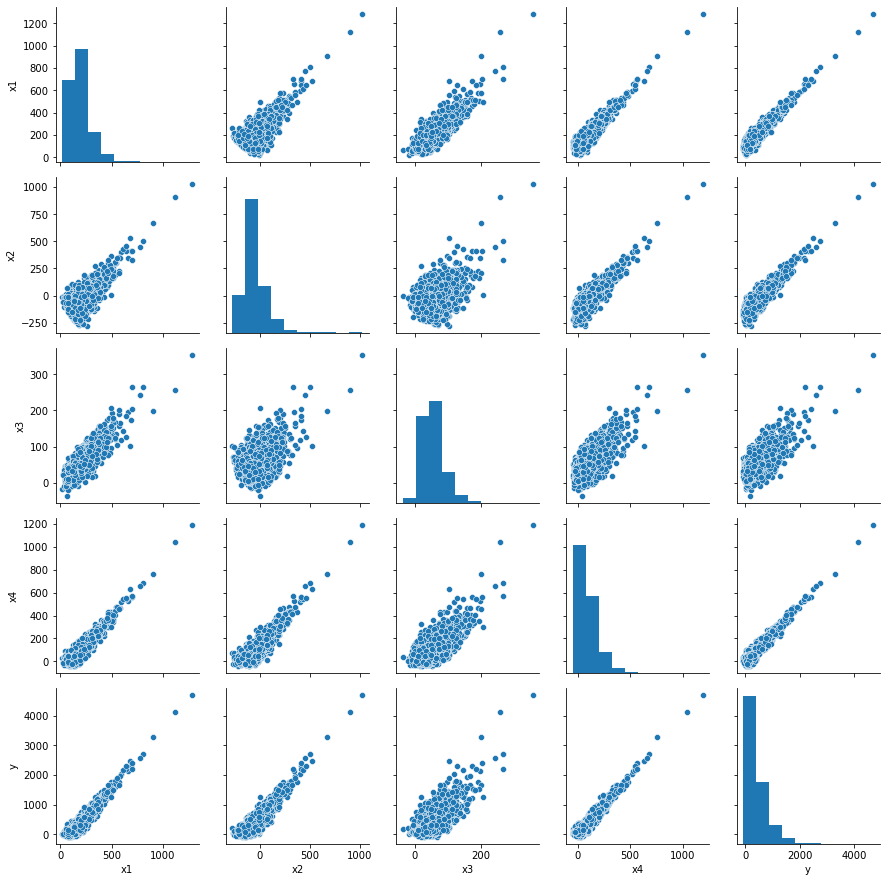

In [22]:
#let's add y on to the matrix of x values, as the last column,  this is a horizontal stack in numpy
# note the need to reshape Y to 2000,1

x_p=np.hstack((x,Y.reshape(2000,1)))

x_p=pd.DataFrame(x_p,columns=['x1','x2','x3','x4','y'])
g = sns.PairGrid(x_p)
g = g.map_diag(plt.hist)
#g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [23]:
Y.reshape(2000,1)

array([[239.2367008 ],
       [197.2929183 ],
       [170.60912529],
       ...,
       [499.90211788],
       [593.79551719],
       [155.2162826 ]])

In [13]:
## Eigennalysis of Correlation patterns in predictors

w,v=np.linalg.eigh(np.corrcoef(x.T))
w,v

(array([0.03114604, 0.10103562, 0.60164985, 3.26616849]),
 array([[ 0.55444775,  0.61445617,  0.16962655, -0.53503097],
        [ 0.30758464, -0.50012477, -0.66220434, -0.46556666],
        [-0.05128513, -0.54303753,  0.70498994, -0.45328717],
        [-0.77158876,  0.27826079, -0.18894822, -0.53992619]]))

In [26]:
w

array([0.02779273, 0.09290837, 0.55895238, 3.32034652])

In [28]:
w/w.sum()

array([0.00694818, 0.02322709, 0.13973809, 0.83008663])

based on the eigenvalues/(sum(eigenvalues))

83% of the correlation is due to the last eigen vector
13.9% is the third eigen vector
2.3% is the second
0.69% is the first

We could really ignore the first two vectors and use only the last two and get all the correlations,   so there are really 
two underlying variables here that can be used to reconstruct x1, x2, x3,x4

In [27]:
# these are the eigen vectors correponding to the eigen values
v

array([[ 0.55138854,  0.62249139,  0.15772511, -0.53253915],
       [ 0.30298719, -0.50231964, -0.66023571, -0.46900165],
       [-0.04155669, -0.53359222,  0.7109489 , -0.45618421],
       [-0.77617169,  0.27469764, -0.18374779, -0.53696878]])

In [ ]:
# This is what is happening in a PCA analysis,   the correlation matrix (or covariance matrix) is decomposed
# into these underlying orthogonal (or independent) eigen vector axes that explain what the independent contributions actually are